In [1]:
# Libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
!pip install chardet
import chardet

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

### 2. Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [2]:
# Getting character format
base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']

# Import data

df_dengue = pd.read_csv( r'../../_data/data_dengue_peru.csv', encoding = charenc, dtype={'Ubigeo': 'str'},low_memory = False)
df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


### 3. Generate ubigeo for Departments and Provinces taking the first two and four numbers.

In [3]:
df_dengue['IDPROV'] = df_dengue['Ubigeo'].astype(str).str[0:4]
df_dengue['IDDPTO'] = df_dengue['Ubigeo'].astype(str).str[0:2]

df_dengue=df_dengue.rename({'Ubigeo': 'IDDIST'}, axis=1)
df_dengue['IDDIST'] = df_dengue['IDDIST'].astype(str).astype(int)

df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,IDDIST,Casos,IDPROV,IDDPTO
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,0809,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,1801,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0,0809,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,0809,08
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,1703,17


### 4. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [4]:
# Upload shapefile-distric level
maps = gpd.read_file(r'../../_data/shape_file/DISTRITOS.shp')
maps

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [5]:
df_dengue['Casos'] = df_dengue['Casos'].str.replace(",","")
df_dengue['Casos'] = df_dengue['Casos'].fillna(0)
df_dengue['Casos'] = df_dengue['Casos'].astype(str).astype(int)

df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,IDDIST,Casos,IDPROV,IDDPTO
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,0809,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0,0809,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,0809,08
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17


In [6]:
df_dengue['Distrito'].unique().size

455

In [7]:
# group_by district
df_dengue_districts= df_dengue.groupby(['IDDIST'])['Casos'].sum().reset_index().copy()
df_dengue_districts

,IDDIST,Casos
0,10101,6
1,10201,949
2,10202,49
3,10203,47
4,10204,10
...,...,...
470,250302,125
471,250303,187
472,250304,45
473,250305,8


In [8]:
# group_by district
#df_dengue_districts = df_dengue.copy()
#df_dengue_districts['Casos_distrito'] = df_dengue_districts.groupby(['Distrito'])['Casos_distrito'].transform('sum')

# Merge geometry with data
maps['IDDIST'] = maps['IDDIST'].astype(str).astype(int)

maps1 = maps[['IDDIST','DISTRITO', 'geometry']]
data_geo1 = maps1.merge(df_dengue_districts, on='IDDIST', how='left')
data_geo1

,IDDIST,DISTRITO,geometry,Casos
0,100902,CODO DEL POZUZO,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",49.0
1,100904,TOURNAVISTA,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",56.0
2,250305,ALEXANDER VON HUMBOLDT,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...",8.0
3,250302,IRAZOLA,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...",125.0
4,250304,NESHUYA,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...",45.0
...,...,...,...,...
1868,100608,CASTILLO GRANDE,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",562.0
1869,100609,PUEBLO NUEVO,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...",22.0
1870,100610,SANTO DOMINGO DE ANDA,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...",NaN
1871,211105,SAN MIGUEL,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...",NaN


In [10]:
base=gpd.GeoDataFrame(data_geo1, geometry=data_geo1.geometry)

In [11]:
base

,IDDIST,DISTRITO,geometry,Casos
0,100902,CODO DEL POZUZO,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",49.0
1,100904,TOURNAVISTA,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",56.0
2,250305,ALEXANDER VON HUMBOLDT,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...",8.0
3,250302,IRAZOLA,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...",125.0
4,250304,NESHUYA,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...",45.0
...,...,...,...,...
1868,100608,CASTILLO GRANDE,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",562.0
1869,100609,PUEBLO NUEVO,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...",22.0
1870,100610,SANTO DOMINGO DE ANDA,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...",NaN
1871,211105,SAN MIGUEL,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...",NaN


<AxesSubplot:>

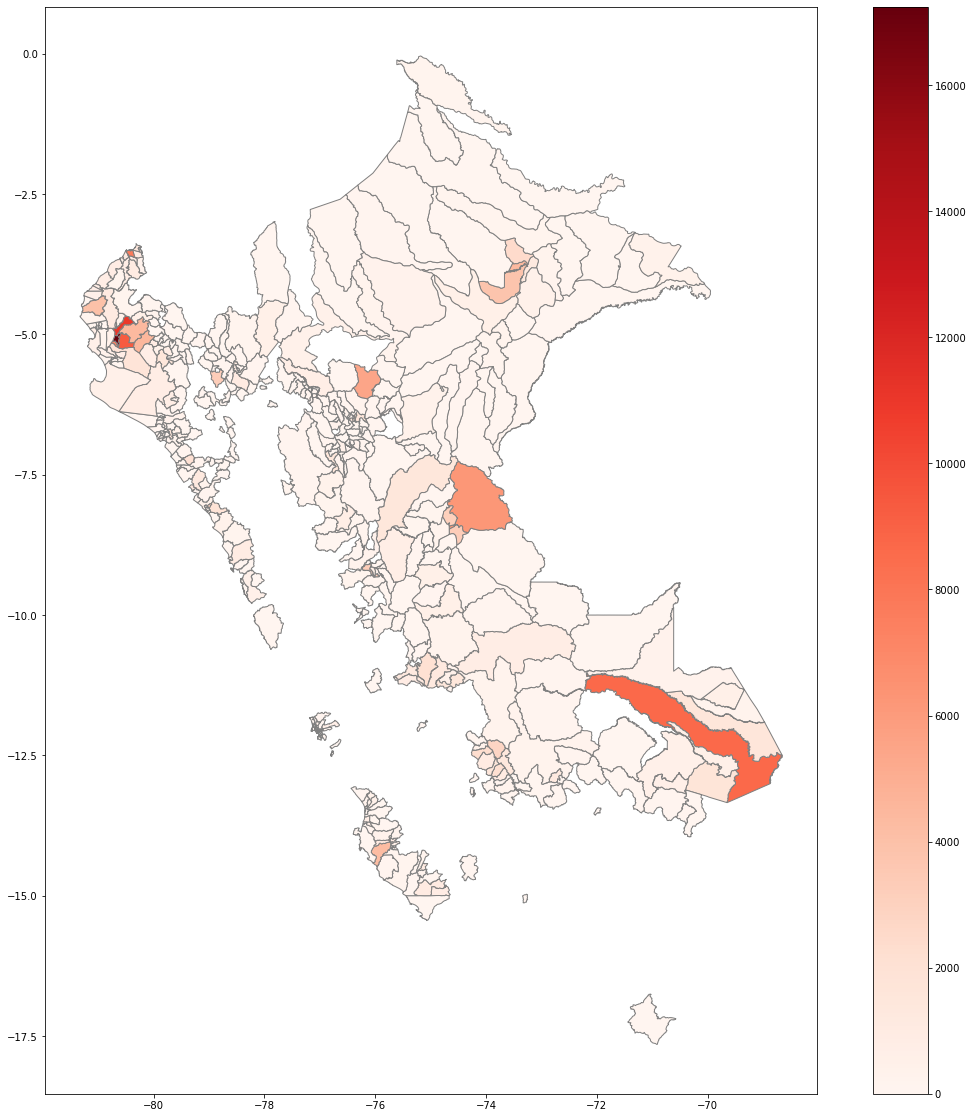

In [12]:
#fig, ax = plt.subplots(figsize=(20, 20))

#base.plot(  ax=ax, color='midnightblue', linestyle='dashdot',edgecolor='black' )
#plt.show()


base.plot(column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True)


#plt.show()

### 5. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.


In [14]:
# group_by district

df_dengue['IDPROV'] = df_dengue['IDPROV'].astype(str).astype(int)
df_dengue_province= df_dengue.groupby(['IDPROV'])['Casos'].sum().reset_index().copy()
df_dengue_province

,IDPROV,Casos
0,101,6
1,102,1253
2,103,4
3,104,642
4,107,1312
...,...,...
89,2403,3674
90,2501,13046
91,2502,1048
92,2503,1119


In [15]:
# Merge geometry with data

maps['IDPROV'] = maps['IDPROV'].astype(str).astype(int)

maps2 = maps[['IDPROV','PROVINCIA', 'geometry']]

data_geo2 = maps2.merge(df_dengue_province, on='IDPROV', how='left')
data_geo2

,IDPROV,PROVINCIA,geometry,Casos
0,1009,PUERTO INCA,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",817.0
1,1009,PUERTO INCA,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",817.0
2,2503,PADRE ABAD,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...",1119.0
3,2503,PADRE ABAD,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...",1119.0
4,2503,PADRE ABAD,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...",1119.0
...,...,...,...,...
1868,1006,LEONCIO PRADO,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",4632.0
1869,1006,LEONCIO PRADO,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...",4632.0
1870,1006,LEONCIO PRADO,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...",4632.0
1871,2111,SAN ROMAN,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...",NaN


In [17]:
base= gpd.GeoDataFrame(data_geo2, geometry=data_geo2.geometry)

<AxesSubplot:>

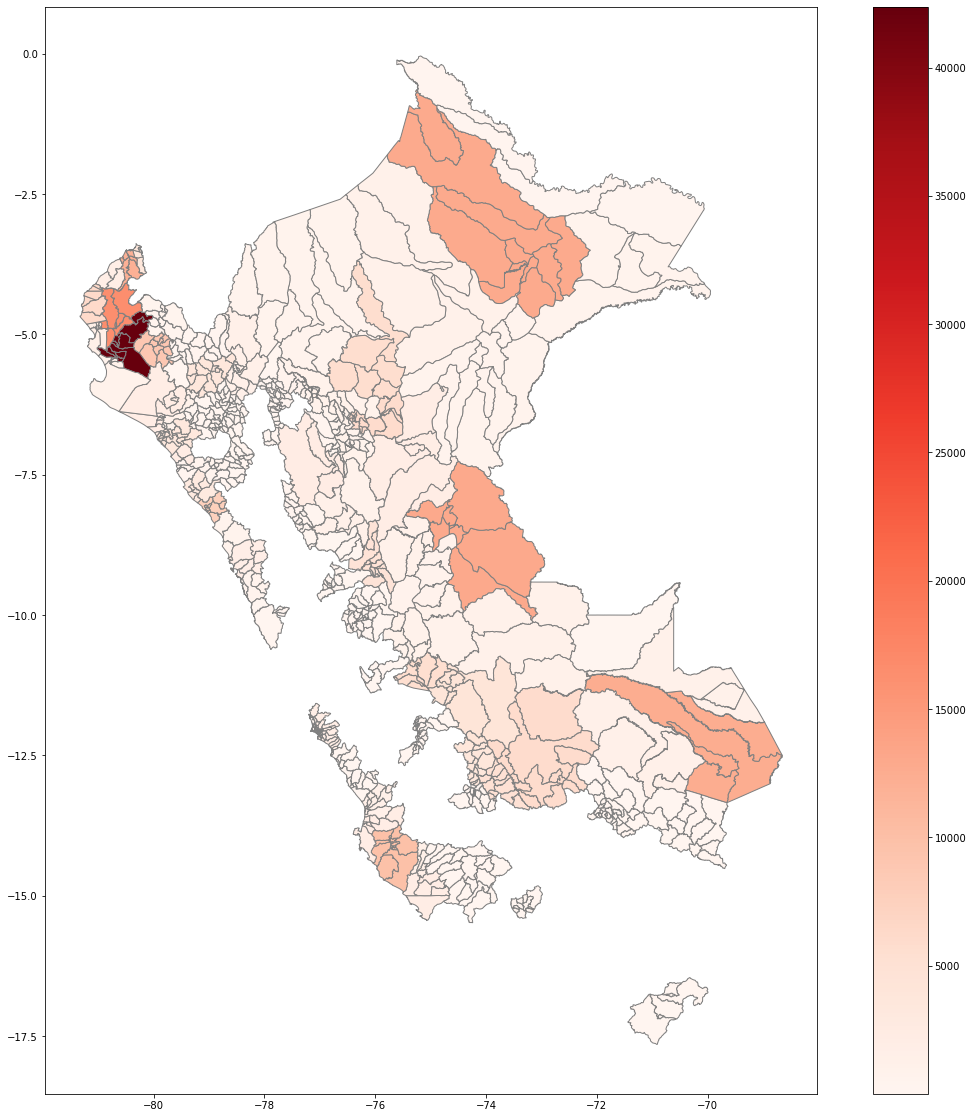

In [18]:
base.plot(column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True)

